# Import dependencies

In [1]:
#import os
#os.environ['THEANO_FLAGS'] = "device=cuda,force_device=True,floatX=float32"
#import theano

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import Callback
from keras import regularizers
from keras import optimizers

from functools import partial

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np

Using TensorFlow backend.


# Import data

In [2]:
def one_hot(y):
    t = np.zeros((len(y), np.max(y) + 1))
    t[np.arange(len(y)), y] = 1
    return t

(60000, 784)
(60000, 10)


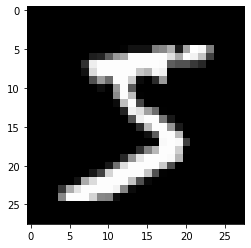

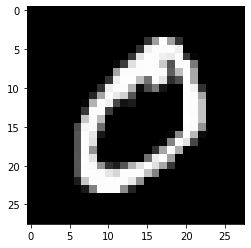

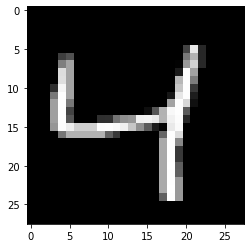

In [3]:
#PUT HERE DATA FROM https://keras.io/datasets/ 

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# flatten data
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# transform decimal to unitary code
y_train = one_hot(y_train)
y_test = one_hot(y_test)

print(x_train.shape)
print(y_train.shape)

for i in range(3):
    plt.imshow(x_train[i].reshape(28,28), cmap = 'gray')
    plt.show()

## Experimentation

Plot drawing

In [6]:
def plot_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Setting parameters

In [7]:
style = {'description_width': 'initial'}
@interact_manual(
    n_layers=IntSlider(min=0, max=4, value=2, description='Layers: '),
    layer_size=IntSlider(min=0, max=20, value=6, description='Neurons per layer: ', style=style),
    layer1_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 1 activation type: ', style=style),
    layer2_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 2 activation type ', style=style),
    layer3_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 3 activation type: ', style=style),
    layer4_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 4 activation type: ', style=style),
    layer_out_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='sigmoid',
                          description='Output layer activation type: ', style=style),
    loss_func=Dropdown(options={
        'Standard deviation': 'mse', 
        'Mean absolute deviation': 'mae',
        'Binary crossentropy': 'binary_crossentropy',
        'Categorical crossentropy': 'categorical_crossentropy'
    }, value='categorical_crossentropy', description='Loss function: ', style=style),
    batch_size = BoundedIntText(min=0, max=len(x_train), value=100, description='Batch size: ', style=style),
    lr=ToggleButtons(options=["-0.1", "0", "0.001", "0.01", "0.05", "0.1", "0.5", "1", "5"], 
                               value="0.01", description='Learn rate: ', style=style),
    l1=ToggleButtons(options=["-0.1", "0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"], 
                               value="0.0001", description='Regularization  L1: ', style=style),
    l2=ToggleButtons(options=["-0.1", "0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"], 
                               value="0.0001", description='Regularization  L2: ', style=style),
    epochs=IntSlider(min=10, max=100, step=10, value=20, description='Epoch count: ', style=style),
)
def interactive_learning(n_layers, loss_func, batch_size, lr, l1, l2, 
                         layer_out_type, epochs,
                         layer_size,
                         layer1_type, layer2_type, layer3_type, layer4_type):
    layer_sizes = [layer_size, layer_size, layer_size, layer_size]
    layer_types = [layer1_type, layer2_type, layer3_type, layer4_type]
    lr = float(lr)
    l1 = float(l1)
    l2 = float(l2)
    
    model = Sequential()
    
    if n_layers == 0:
        model.add(Dense(len(y_train[0]), activation=layer_out_type, 
                        input_shape=x_train[0].shape, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    else:
        model.add(Dense(layer_sizes[0], activation=layer_types[0], 
                        input_shape=x_train[0].shape, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
        for i in range(1, n_layers):
            model.add(Dense(layer_sizes[i], activation=layer_types[i],
                           kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
        model.add(Dense(len(y_train[0]), activation=layer_out_type, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    
    model.compile(
     optimizer = optimizers.sgd(lr=lr),
#      optimizer = optimizers.adam(lr),
     loss = loss_func,
     metrics = ["accuracy"]
    )
    
    print(model.summary())
    
    history = model.fit(
     x_train, y_train,
     epochs=epochs,
     batch_size=batch_size,
     validation_data=(x_test, y_test),
     verbose=1
    )
    
    print('Accuracy: ', history.history['val_accuracy'][-1])
    plot_accuracy(history)
    
    for i in range(3):
        plt.imshow(x_train[i].reshape(28,28), cmap = 'gray')
        print(model.predict_classes(x_train[i].reshape(1, 784))[0])
        print(list(zip(y_train[i], model.predict(x_train[i].reshape(1, 784))[0])))
        plt.show()
    #plot_contour_graph(model)

interactive(children=(IntSlider(value=2, description='Layers: ', max=4), Dropdown(description='Loss function: …

In [9]:
style = {'description_width': 'initial'}
@interact_manual(
    n_layers=IntSlider(min=0, max=4, value=2, description='Layers: '),
    layer_size=IntSlider(min=0, max=20, value=6, description='Neurons per layer: ', style=style),
    layer1_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 1 activation type: ', style=style),
    layer2_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 2 activation type ', style=style),
    layer3_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 3 activation type: ', style=style),
    layer4_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 4 activation type: ', style=style),
    layer_out_type=Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='sigmoid',
                          description='Output layer activation type: ', style=style),
    loss_func=Dropdown(options={
        'Standard deviation': 'mse', 
        'Mean absolute deviation': 'mae',
        'Binary crossentropy': 'binary_crossentropy',
        'Categorical crossentropy': 'categorical_crossentropy'
    }, value='categorical_crossentropy', description='Loss function: ', style=style),
    batch_size = BoundedIntText(min=0, max=len(x_train), value=100, description='Batch size: ', style=style),
    lr=ToggleButtons(options=["-0.1", "0", "0.001", "0.01", "0.05", "0.1", "0.5", "1", "5"], 
                               value="0.01", description='Learn rate: ', style=style),
    l1=ToggleButtons(options=["-0.1", "0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"], 
                               value="0.0001", description='Regularization  L1: ', style=style),
    l2=ToggleButtons(options=["-0.1", "0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"], 
                               value="0.0001", description='Regularization  L2: ', style=style),
    epochs=IntSlider(min=10, max=100, step=10, value=20, description='Epoch count: ', style=style),
)
def interactive_learning(n_layers, loss_func, batch_size, lr, l1, l2, 
                         layer_out_type, epochs,
                         layer_size,
                         layer1_type, layer2_type, layer3_type, layer4_type):
    layer_sizes = [layer_size, layer_size, layer_size, layer_size]
    layer_types = [layer1_type, layer2_type, layer3_type, layer4_type]
    lr = float(lr)
    l1 = float(l1)
    l2 = float(l2)
    
    model = Sequential()
    
    if n_layers == 0:
        model.add(Dense(len(y_train[0]), activation=layer_out_type, 
                        input_shape=x_train[0].shape, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    else:
        model.add(Dense(layer_sizes[0], activation=layer_types[0], 
                        input_shape=x_train[0].shape, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
        for i in range(1, n_layers):
            model.add(Dense(layer_sizes[i], activation=layer_types[i],
                           kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
        model.add(Dense(len(y_train[0]), activation=layer_out_type, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    
    model.compile(
     optimizer = optimizers.sgd(lr=lr),
#      optimizer = optimizers.adam(lr),
     loss = loss_func,
     metrics = ["accuracy"]
    )
    
    print(model.summary())
    
    history = model.fit(
     x_train, y_train,
     epochs=epochs,
     batch_size=batch_size,
     validation_data=(x_test, y_test),
     verbose=1
    )
    
    print('Accuracy: ', history.history['val_accuracy'][-1])
    plot_accuracy(history)
    
    for i in range(3):
        plt.imshow(x_train[i].reshape(28,28), cmap = 'gray')
        print(model.predict_classes(x_train[i].reshape(1, 784))[0])
        print(list(zip(y_train[i], model.predict(x_train[i].reshape(1, 784))[0])))
        plt.show()
    #plot_contour_graph(model)

interactive(children=(IntSlider(value=2, description='Layers: ', max=4), Dropdown(description='Loss function: …